In [1]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from sklearn.dummy import DummyClassifier
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

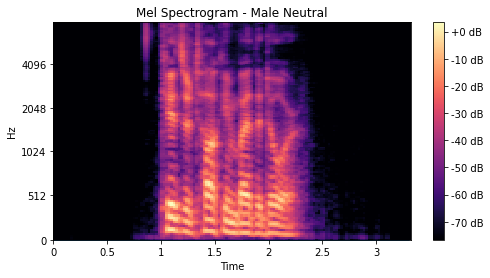

In [2]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB')

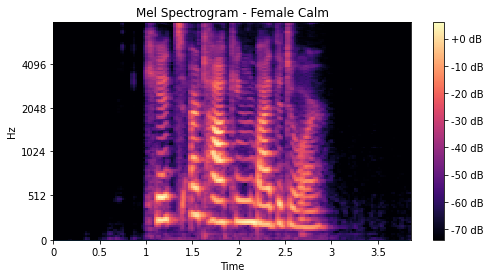

In [3]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB')

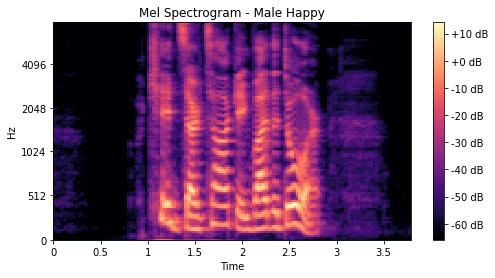

In [4]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)
librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB')

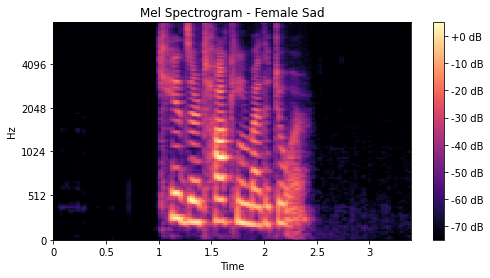

In [5]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_04/03-01-04-01-01-01-04.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Sad')
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB')

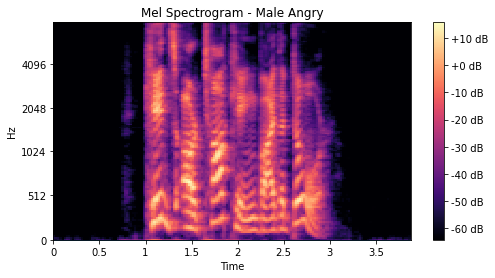

In [6]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Angry')
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB')

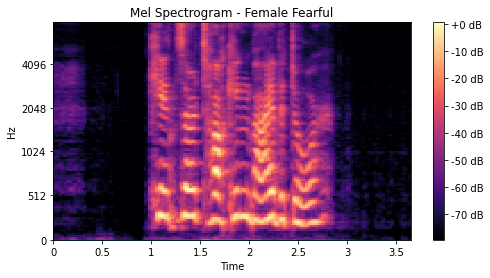

In [7]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB')

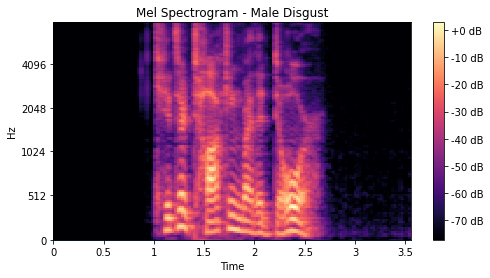

In [8]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_07/03-01-07-01-01-01-07.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB')

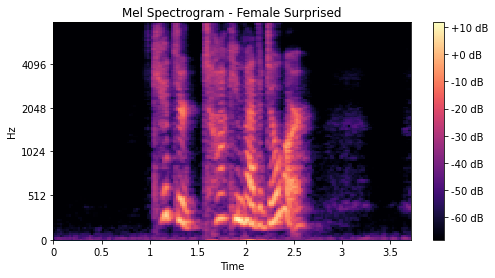

In [9]:
x, sr = librosa.load('/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_08/03-01-08-01-01-01-08.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)
librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB')

In [10]:
audio = "/content/drive/MyDrive/Audio_Speech_Actors_01-24/"
actor_folders = os.listdir(audio)
actor_folders.sort() 
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [11]:
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i)
    for f in filename:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg % 2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,calm,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1,male,neutral,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
2,male,neutral,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
3,male,calm,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
4,male,neutral,1,/content/drive/MyDrive/Audio_Speech_Actors_01-...
...,...,...,...,...
1435,female,disgust,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1436,female,surprise,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1437,female,surprise,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...
1438,female,surprise,24,/content/drive/MyDrive/Audio_Speech_Actors_01-...


In [12]:
pd.set_option('display.max_colwidth', -1)
audio_df.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,gender,emotion,actor,path
253,male,calm,5,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_05/03-01-02-02-02-02-05.wav
733,male,happy,13,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_13/03-01-03-01-01-01-13.wav
1105,male,happy,19,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_19/03-01-03-02-02-02-19.wav
1378,male,surprise,23,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_23/03-01-08-01-02-02-23.wav
814,female,sad,14,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_14/03-01-04-02-02-02-14.wav
974,male,calm,17,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_17/03-01-02-02-02-02-17.wav
1032,female,happy,18,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_18/03-01-03-01-02-02-18.wav
406,male,surprise,7,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_07/03-01-08-01-02-02-07.wav
1413,female,angry,24,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_24/03-01-05-01-02-01-24.wav
1239,male,fear,21,/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_21/03-01-06-01-02-02-21.wav


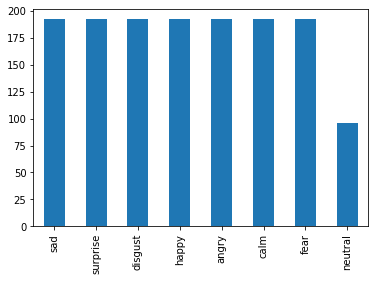

In [13]:
audio_df.emotion.value_counts().plot(kind='bar')

In [14]:
df = pd.DataFrame(columns=['mel_spectrogram'])
for index, path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec, axis = 0)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    mfcc = np.mean(mfcc,axis=0)
    df.loc[index] = [log_spectrogram]
print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-83.15077541661235, -83.15077541661235, -83.15077541661235, -83.15077541661235, -83.15077541661235, -83.15077541661235, -83.15077541661235, -83.1365455700083, -83.10812102363909, -83.15077541661235, -83.15077541661235, -83.14130628586219, -82.37244867250924, -82.12157565944929, -81.6883152669627, -80.64292451561477, -81.10277818841176, -80.85587718655171, -81.77179822616215, -82.97925586087146, -82.59167310511626, -82.88918856750935, -83.06168362625561, -83.07820839449222, -83.15077541661235, -83.01733422375206, -82.86424535741956, -82.34662873840172, -80.91317362324538, -80.11132350842024, -81.3367883377866, -81.87928071177997, -82.31814073806555, -82.66038748154705, -82.5017376797219, -82.17024986636417, -80.891314974854, -78.14449366667455, -74.36536122454007, -74.15345014032097, -75.37412663281142, -73.59718637264848, -66.10195272401272, -47.97299626184571, -43.003084777541375, -43.9094926245575, -45.47785632369583, -45.99648848760904, -46.93008902526208, -47.180902451968, -42.5007956854192, -38.555688572734255, -37.900311070912466, -37.33647189589423, -36.44632480142975, -36.16424431910202, -36.75279031565633, -37.5478378215452, -38.59876295055771, -39.1207575256718, -40.033070533119805, -41.36440322159804, -43.76096416261054, -46.87514083648463, -49.356610824519755, -51.26610674099857, -52.82420486358601, -52.858010787696585, -51.61170489424993, -49.115290044164816, -46.44829364860427, -44.444535416150124, -43.17568524634482, -42.92389432887027, -41.89867234615598, -42.44883403491836, -43.22001724993466, -44.63370078886483, -45.80103538296123, -46.041236359879015, -46.17477765715451, -47.68434095710514, -51.81049517330807, -57.35543373581632, -59.37067109427504, -61.82383130027359, -61.04812652974738, -45.27791023789754, -40.56990569852464, -43.059306238093875, -45.37939489550343, -46.78520939553707, -46.149561381210894, -44.78147649547254, -45.456923667400645, -46.674820092899466, -44.94485747685504, -41.47103797287131, -40.812311304833344, -41.2332730383129, ...]"
1,"[-75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.13955974153885, -75.07220077243758, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.09934266042937, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.10901537202665, -75.09408877165822, -75.15068067027298, -74.92820756907354, -74.15170362970186, -74.1984115429784, -74.51546564667889, -75.11950793273981, -75.10395706999931, -75.1316215562021, -75.15068067027298, -75.15068067027298, -75.14985519143947, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.15068067027298, -75.06899046004926, -74.1209942413135, -73.61769341989277, -74.53599410911838, -74.17389022851293, -73.56240248675114, -72.48512704595969, -73.08481369380638, -49.68083991265907, -39.80158828932529, -36.83080825028726, -35.70477472595369, -34.180240377905896, -31.86352548424933, -30.693146162855815, -30.325387168995668, -30.965012090589294, -30.824061818520622, -30.033745224019615, -28.690538080048178, -28.168773071109534, -28.138544948800163, -29.081395007963764, -30.78727652253028, -33.000290359015246, -37.5142122854311, -41.93030881813185, -44.93862898327501, -44.38325931206803, -41.12110946271323, -40.154668351876644, -39.989050133362426, -39.93818821640035, -41.25290543468173, -40.45350148546556, -37.33885651213937, -35.71059740329532, -36.26966714875569, -36.07095028002186, -36.35251377333014, -36.93649708446232, -38.03057115241532, -39.89993173264172, -40.52548277814819, -41.244246871950345, -41.38378595669763, -40.334251974502095, -38.54266858967055, -39.55792747319825, -40.66742610173538, -37.19941444450589, -32.58195609915778, -32.73895214194316, -33.552595622074584, -37.302280892286085, -43.40358195364052, -39.87772300976965, -35.74480112600473, -34.76520044612398, -34.00361733869703, -33.99902168405883, -34.42433932514651, -35.47767449332

In [151]:
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)
df_combined.drop(columns='path',inplace=True)
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,male,calm,1,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.136546,-83.108121,-83.150775,-83.150775,-83.141306,-82.372449,-82.121576,-81.688315,-80.642925,-81.102778,-80.855877,-81.771798,-82.979256,-82.591673,-82.889189,-83.061684,-83.078208,-83.150775,-83.017334,-82.864245,-82.346629,-80.913174,-80.111324,-81.336788,-81.879281,-82.318141,-82.660387,-82.501738,-82.170250,-80.891315,...,-79.314458,-79.012199,-79.573820,-82.710974,-82.590587,-82.756658,-82.743094,-83.135523,-83.150775,-82.890300,-81.853539,-82.047997,-82.500424,-83.141921,-83.150775,-83.150775,-83.142892,-83.142491,-83.150775,-83.138198,-83.147958,-83.150775,-83.150775,-83.150775,-82.635422,-82.245518,-82.980741,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775,-83.150775
1,male,neutral,1,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.139560,-75.072201,-75.150681,-75.150681,-75.150681,-75.150681,-75.099343,-75.150681,-75.150681,-75.150681,-75.109015,-75.094089,-75.150681,-74.928208,-74.151704,-74.198412,-74.515466,-75.119508,-75.103957,-75.131622,-75.150681,-75.150681,-75.149855,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.068990,-74.120994,...,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.112209,-75.101378,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-75.150681,-74.863877,-74.294667,-74.354414,-74.683039,-74.923625,-74.443986,-74.158666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.242888,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.245163,-75.045558,-74.991563,-75.199775,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-75.268335,-74.348424,-73.925284,...,-74.795695,-74.800506,-74.906145,-75.227001,-75.110288,-74.772556,-74.482432,-74.727943,-75.072190,-75.161385,-75.264752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,calm,1,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.438972,-78.454330,-78.454330,-78.454330,-78.410547,-78.450808,-78.454330,-78.423913,-78.209057,-78.261917,-78.393136,-78.182066,-76.545662,-77.805331,-78.356791,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.358254,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.454330,-78.303447,-77.402490,...,-77.662819,-77.959903,-77.530849,-77.818775,-78.393118,-78.245949,-78.109727,-77.947225,-77.856563,-78.035494,-77.977157,-78.129136,-78.303883,-78.454330,-78.371010,-78.163969,-78.345866,-78.445223,-78.454330,-78.454330,-78.365060,-78.218259,-78.112265,-78.430497,-78.454330,-78.054062,-77.933081,-78.429642,-78.454330,-78.211660,-78.155524,-78.425661,-78.454330,-78.454330,-78.454330,-78.441253,-78.454330,0.000000,0.000000,0.000000
4,male,neutral,1,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.384823,-76.367504,-76.372107,-76.384823,-76.384823,-76.173958,-75.719145,-75.941572,-75.642659,-75.908988,-75.831011,-75.750751,-74.779811,-72.831309,-71.263080,-66.

In [152]:
train,test = train_test_split(df_combined, test_size=0.2, random_state=0, stratify=df_combined[['emotion','gender','actor']])
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [153]:
from sklearn import tree


print(X_train.shape)
print(X_test.shape)
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

(1152, 259)
(288, 259)


0.11458333333333333

In [154]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.3159722222222222

In [155]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
print(lb.classes_)
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_train.shape

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]
['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1152, 259, 1)

In [156]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(layers.Conv1D(64, kernel_size=(8), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(6)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(8),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(6)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(256, kernel_size=(5),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(1)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_185 (Conv1D)          (None, 252, 64)           576       
_________________________________________________________________
batch_normalization_166 (Bat (None, 252, 64)           256       
_________________________________________________________________
conv1d_186 (Conv1D)          (None, 245, 128)          65664     
_________________________________________________________________
batch_normalization_167 (Bat (None, 245, 128)          512       
_________________________________________________________________
max_pooling1d_129 (MaxPoolin (None, 40, 128)           0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 40, 128)           0         
_________________________________________________________________
conv1d_187 (Conv1D)          (None, 33, 128)         

In [157]:
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history = model.fit(X_train, y_train,batch_size=64, epochs=180, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/180
16/18 [=========================>....] - ETA: 0s - loss: 2.9182 - accuracy: 0.2197
Epoch 00001: val_accuracy improved from -inf to 0.33681, saving model to best_initial_model.hdf5
18/18 [==============================] - 0s 26ms/step - loss: 2.8856 - accuracy: 0.2257 - val_loss: 2.7831 - val_accuracy: 0.3368
Epoch 2/180
13/18 [====================>.........] - ETA: 0s - loss: 2.6460 - accuracy: 0.2800
Epoch 00002: val_accuracy did not improve from 0.33681
18/18 [==============================] - 0s 10ms/step - loss: 2.6087 - accuracy: 0.2839 - val_loss: 2.6812 - val_accuracy: 0.2917
Epoch 3/180
13/18 [====================>.........] - ETA: 0s - loss: 2.5060 - accuracy: 0.3149
Epoch 00003: val_accuracy did not improve from 0.33681
18/18 [==============================] - 0s 10ms/step - loss: 2.4819 - accuracy: 0.3220 - val_loss: 2.6723 - val_accuracy: 0.2361
Epoch 4/180
15/18 [========================>.....] - ETA: 0s - loss: 2.3281 - accuracy: 0.3125
Epoch 00004: val_accura

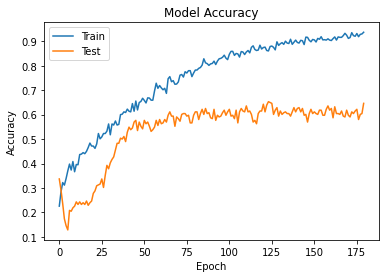

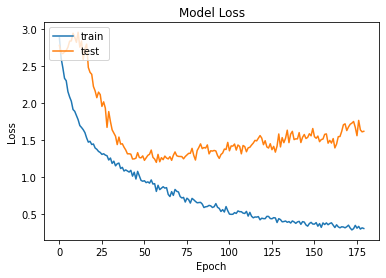

In [158]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [159]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 3ms/step - loss: 1.6177 - accuracy: 0.6458
Loss of the model is -  1.617658257484436
9/9 [==============================] - 0s 3ms/step - loss: 1.6177 - accuracy: 0.6458
Accuracy of the model is -  64.58333134651184 %


In [160]:
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

finaldf = actual.join(predictions)
finaldf[140:160]

,Actual Values,Predicted Values
140,sad,calm
141,surprise,surprise
142,neutral,disgust
143,sad,sad
144,fear,surprise
145,sad,happy
146,disgust,disgust
147,angry,angry
148,surprise,surprise
149,angry,angry


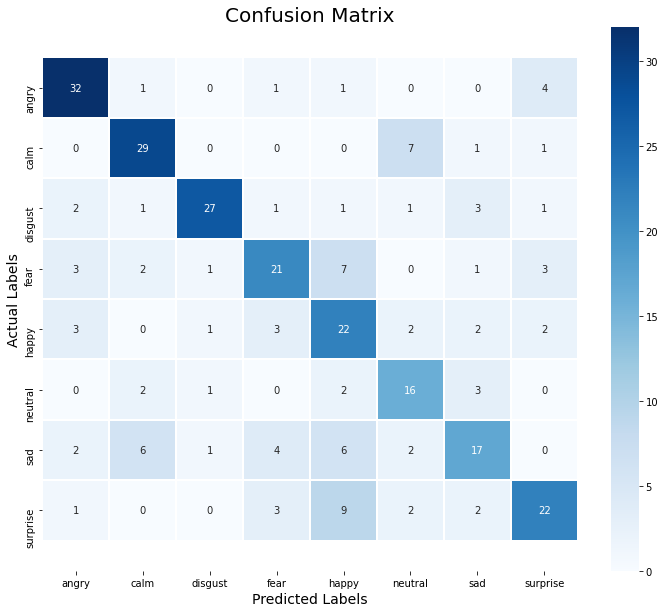

In [161]:
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()